In [1]:
import pandas as pd

In [115]:
dados = pd.read_csv('./data/municipios-13-22-cl.csv', encoding='cp850', skiprows=3, sep=';', skipfooter=12)
dados

C:\Users\pbitg\AppData\Local\Temp\ipykernel_29316\3280577715.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv('./data/municipios-13-22-cl.csv', encoding='cp850', skiprows=3, sep=';', skipfooter=12)


,MunicÝpio,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,...,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,Total
0,110001 ALTA FLORESTA D'OESTE,54296.20,60965.89,64765.53,60049.78,58470.43,58904.72,60636.20,61192.05,63146.10,...,43426.50,42682.45,51087.54,51620.61,35400.78,35484.65,43707.12,55265.43,70154.93,6.539565e+06
1,110002 ARIQUEMES,314442.36,229309.02,363374.06,319475.97,329931.82,265113.60,307992.87,401918.00,218744.87,...,518379.37,520401.21,472279.77,517816.60,439836.82,498239.43,492509.92,443911.64,472371.84,5.764244e+07
2,110003 CABIXI,9001.16,7674.20,7712.90,6845.91,6781.59,6903.89,7724.15,8907.74,7500.72,...,3326.04,4454.34,3995.22,6247.00,7223.19,5521.07,6243.29,6999.95,5107.09,9.248790e+05
3,110004 CACOAL,255876.64,299198.37,359003.89,355762.00,364587.30,374006.55,398416.71,380448.62,431110.07,...,1201314.54,615367.14,847879.14,685349.44,906850.17,739106.68,650801.74,805428.92,640570.50,9.339581e+07
4,110005 CEREJEIRAS,44450.08,53261.84,50449.20,51282.47,49936.93,47915.65,33163.77,27581.86,39750.61,...,31546.00,34898.05,31431.73,38674.95,44759.29,41989.53,43705.76,38040.90,31082.31,4.520314e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,522185 VALPARAISO DE GOIAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70316.43,57372.98,58910.73,46464.99,56056.74,51676.87,39091.81,33419.25,38362.58,2.620419e+06
3447,522200 VIANOPOLIS,36948.42,36023.45,35692.24,39440.84,32822.52,33091.28,28674.83,38130.97,35302.91,...,23322.45,25592.80,27625.56,28157.65,26124.66,19636.61,22347.21,20479.54,12995.53,3.325284e+06
3448,522205 VICENTINOPOLIS,3233.56,4100.05,5100.13,5507.60,6227.17,7052.17,5897.66,7687.58,6159.08,...,9692.08,8182.01,13234.67,7632.93,12364.66,6647.13,12154.34,5640.58,9106.42,9.407299e+05
3449,522220 VILA BOA,3725.66,1901.62,4100.70,10467.11,11622.94,9917.30,1935.95,568.45,2344.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097971e+05


In [3]:
print(type(dados))
print('---------')
print(dados.shape)
print('---------')
print(dados.dtypes)

<class 'pandas.core.frame.DataFrame'>
---------
(3451, 122)
---------
MunicÝpio     object
2013/Jan     float64
2013/Fev     float64
2013/Mar     float64
2013/Abr     float64
              ...   
2022/Set     float64
2022/Out     float64
2022/Nov     float64
2022/Dez     float64
Total        float64
Length: 122, dtype: object


In [4]:
# Renomear coluna do município
dados = dados.rename(columns={'MunicÝpio': 'municipio'})

# Tirar a coluna de total
dados.drop(columns =["Total"], inplace = True)

# Separar o código do IBGE em uma coluna separada para usá-lo como key
dados['cod_ibge'] = dados['municipio'].str.split(" ", n=1, expand = True)[0]
dados['municipio'] = dados['municipio'].str.split(" ", n=1, expand = True)[1]
dados.head(3)

,municipio,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,...,2022/Abr,2022/Mai,2022/Jun,2022/Jul,2022/Ago,2022/Set,2022/Out,2022/Nov,2022/Dez,cod_ibge
0,ALTA FLORESTA D'OESTE,54296.20,60965.89,64765.53,60049.78,58470.43,58904.72,60636.20,61192.05,63146.10,...,43426.50,42682.45,51087.54,51620.61,35400.78,35484.65,43707.12,55265.43,70154.93,110001
1,ARIQUEMES,314442.36,229309.02,363374.06,319475.97,329931.82,265113.60,307992.87,401918.00,218744.87,...,518379.37,520401.21,472279.77,517816.60,439836.82,498239.43,492509.92,443911.64,472371.84,110002
2,CABIXI,9001.16,7674.20,7712.90,6845.91,6781.59,6903.89,7724.15,8907.74,7500.72,...,3326.04,4454.34,3995.22,6247.00,7223.19,5521.07,6243.29,6999.95,5107.09,110003


In [5]:
# Transformar para formato longo, mais fácil para o computador ler
formato_longo = dados.melt(id_vars=['cod_ibge', 'municipio'], 
                   var_name='competencia', 
                   value_name='valor').dropna()
formato_longo

,cod_ibge,municipio,competencia,valor
0,110001,ALTA FLORESTA D'OESTE,2013/Jan,54296.20
1,110002,ARIQUEMES,2013/Jan,314442.36
2,110003,CABIXI,2013/Jan,9001.16
3,110004,CACOAL,2013/Jan,255876.64
4,110005,CEREJEIRAS,2013/Jan,44450.08
...,...,...,...,...
414114,522170,URUANA,2022/Dez,13206.10
414115,522185,VALPARAISO DE GOIAS,2022/Dez,38362.58
414116,522200,VIANOPOLIS,2022/Dez,12995.53
414117,522205,VICENTINOPOLIS,2022/Dez,9106.42


In [31]:
# Transformar o código do IBGE em número (estava como objeto)
formato_longo["cod_ibge"] = pd.to_numeric(formato_longo["cod_ibge"])
formato_longo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365753 entries, 0 to 414119
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cod_ibge     365753 non-null  int64  
 1   municipio    365753 non-null  object 
 2   competencia  365753 non-null  object 
 3   valor        365753 non-null  float64
 4   cod_regiao   365753 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 24.8+ MB


In [24]:
regioes = pd.DataFrame([
                        ['1', 'norte', 'N'], 
                        ['2', 'nordeste', 'NE'], 
                        ['3', 'sudeste', 'SE'], 
                        ['4', 'sul', 'S'], 
                        ['5', 'centro-oeste', 'CE']],
                        columns=['cod_regiao', 'regiao', 'regiao_sigla'])
regioes

,cod_regiao,regiao,regiao_sigla
0,1,norte,N
1,2,nordeste,NE
2,3,sudeste,SE
3,4,sul,S
4,5,centro-oeste,CE


In [33]:
regioes['cod_regiao'] = pd.to_numeric(regioes['cod_regiao'])
regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_regiao    5 non-null      int64 
 1   regiao        5 non-null      object
 2   regiao_sigla  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [34]:
# Pegar o primeiro algarismo do código do IBGE (divisão exata)
formato_longo['cod_regiao'] = formato_longo['cod_ibge'] // 100000
formato_longo

,cod_ibge,municipio,competencia,valor,cod_regiao
0,110001,ALTA FLORESTA D'OESTE,2013/Jan,54296.20,1
1,110002,ARIQUEMES,2013/Jan,314442.36,1
2,110003,CABIXI,2013/Jan,9001.16,1
3,110004,CACOAL,2013/Jan,255876.64,1
4,110005,CEREJEIRAS,2013/Jan,44450.08,1
...,...,...,...,...,...
414114,522170,URUANA,2022/Dez,13206.10,5
414115,522185,VALPARAISO DE GOIAS,2022/Dez,38362.58,5
414116,522200,VIANOPOLIS,2022/Dez,12995.53,5
414117,522205,VICENTINOPOLIS,2022/Dez,9106.42,5


In [43]:
# Incluir a região do município
formato_longo = pd.merge(formato_longo, regioes, how='left', on='cod_regiao')
formato_longo

,cod_ibge,municipio,competencia,valor,cod_regiao,Nome_UF,regiao_x,regiao_sigla_x,regiao_y,regiao_sigla_y
0,110001,ALTA FLORESTA D'OESTE,2013/Jan,54296.20,1,Rondônia,norte,N,norte,N
1,110002,ARIQUEMES,2013/Jan,314442.36,1,Rondônia,norte,N,norte,N
2,110003,CABIXI,2013/Jan,9001.16,1,Rondônia,norte,N,norte,N
3,110004,CACOAL,2013/Jan,255876.64,1,Rondônia,norte,N,norte,N
4,110005,CEREJEIRAS,2013/Jan,44450.08,1,Rondônia,norte,N,norte,N
...,...,...,...,...,...,...,...,...,...,...
365748,522170,URUANA,2022/Dez,13206.10,5,Goiás,centro-oeste,CE,centro-oeste,CE
365749,522185,VALPARAISO DE GOIAS,2022/Dez,38362.58,5,Goiás,centro-oeste,CE,centro-oeste,CE
365750,522200,VIANOPOLIS,2022/Dez,12995.53,5,Goiás,centro-oeste,CE,centro-oeste,CE
365751,522205,VICENTINOPOLIS,2022/Dez,9106.42,5,Goiás,centro-oeste,CE,centro-oeste,CE


In [8]:
# Pacote para ler arquivo excel
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
cod_est = pd.read_excel('./data/RELATORIO_DTB_BRASIL_MUNICIPIO.xls', skiprows=6)
cod_est.shape

(5570, 14)

In [37]:
cod_est.columns

Index(['UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'Código Município Completo', 'Código Município 2',
       'Nome_Município'],
      dtype='object')

In [38]:
# Renomear e filtrar colunas
cod_est = cod_est.rename(columns={'Código Município 2': 'cod_ibge'})
cod_est = cod_est[['cod_ibge', 'Nome_UF']]
cod_est

,cod_ibge,Nome_UF
0,110001,Rondônia
1,110037,Rondônia
2,110040,Rondônia
3,110034,Rondônia
4,110002,Rondônia
...,...,...
5565,522200,Goiás
5566,522205,Goiás
5567,522220,Goiás
5568,522230,Goiás


In [39]:
# Verificar se o tipo de dado do código IBGE é igual em dados e em cod_est
cod_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cod_ibge  5570 non-null   int64 
 1   Nome_UF   5570 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [40]:
# Incluir o nome do estado no df
formato_longo = pd.merge(formato_longo, cod_est, how='left', on='cod_ibge')
formato_longo

,cod_ibge,municipio,competencia,valor,cod_regiao,Nome_UF
0,110001,ALTA FLORESTA D'OESTE,2013/Jan,54296.20,1,Rondônia
1,110002,ARIQUEMES,2013/Jan,314442.36,1,Rondônia
2,110003,CABIXI,2013/Jan,9001.16,1,Rondônia
3,110004,CACOAL,2013/Jan,255876.64,1,Rondônia
4,110005,CEREJEIRAS,2013/Jan,44450.08,1,Rondônia
...,...,...,...,...,...,...
365748,522170,URUANA,2022/Dez,13206.10,5,Goiás
365749,522185,VALPARAISO DE GOIAS,2022/Dez,38362.58,5,Goiás
365750,522200,VIANOPOLIS,2022/Dez,12995.53,5,Goiás
365751,522205,VICENTINOPOLIS,2022/Dez,9106.42,5,Goiás


In [44]:
formato_longo.columns

Index(['cod_ibge', 'municipio', 'competencia', 'valor', 'cod_regiao',
       'Nome_UF', 'regiao_x', 'regiao_sigla_x', 'regiao_y', 'regiao_sigla_y'],
      dtype='object')

In [46]:
# Filtrar colunas
formato_longo = formato_longo[['cod_ibge', 'regiao_x', 'regiao_sigla_x', 'Nome_UF', 'municipio', 'competencia', 'valor']]
formato_longo

,cod_ibge,regiao_x,regiao_sigla_x,Nome_UF,municipio,competencia,valor
0,110001,norte,N,Rondônia,ALTA FLORESTA D'OESTE,2013/Jan,54296.20
1,110002,norte,N,Rondônia,ARIQUEMES,2013/Jan,314442.36
2,110003,norte,N,Rondônia,CABIXI,2013/Jan,9001.16
3,110004,norte,N,Rondônia,CACOAL,2013/Jan,255876.64
4,110005,norte,N,Rondônia,CEREJEIRAS,2013/Jan,44450.08
...,...,...,...,...,...,...,...
365748,522170,centro-oeste,CE,Goiás,URUANA,2022/Dez,13206.10
365749,522185,centro-oeste,CE,Goiás,VALPARAISO DE GOIAS,2022/Dez,38362.58
365750,522200,centro-oeste,CE,Goiás,VIANOPOLIS,2022/Dez,12995.53
365751,522205,centro-oeste,CE,Goiás,VICENTINOPOLIS,2022/Dez,9106.42


In [48]:
# Separar a competência em mês e ano
formato_longo['ano'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[0]
formato_longo['mes'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[1]
formato_longo

C:\Users\pbitg\AppData\Local\Temp\ipykernel_29316\3740814667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formato_longo['ano'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[0]
C:\Users\pbitg\AppData\Local\Temp\ipykernel_29316\3740814667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  formato_longo['mes'] = formato_longo['competencia'].str.split("/", n=1, expand = True)[1]


,cod_ibge,regiao_x,regiao_sigla_x,Nome_UF,municipio,competencia,valor,ano,mes
0,110001,norte,N,Rondônia,ALTA FLORESTA D'OESTE,2013/Jan,54296.20,2013,Jan
1,110002,norte,N,Rondônia,ARIQUEMES,2013/Jan,314442.36,2013,Jan
2,110003,norte,N,Rondônia,CABIXI,2013/Jan,9001.16,2013,Jan
3,110004,norte,N,Rondônia,CACOAL,2013/Jan,255876.64,2013,Jan
4,110005,norte,N,Rondônia,CEREJEIRAS,2013/Jan,44450.08,2013,Jan
...,...,...,...,...,...,...,...,...,...
365748,522170,centro-oeste,CE,Goiás,URUANA,2022/Dez,13206.10,2022,Dez
365749,522185,centro-oeste,CE,Goiás,VALPARAISO DE GOIAS,2022/Dez,38362.58,2022,Dez
365750,522200,centro-oeste,CE,Goiás,VIANOPOLIS,2022/Dez,12995.53,2022,Dez
365751,522205,centro-oeste,CE,Goiás,VICENTINOPOLIS,2022/Dez,9106.42,2022,Dez


In [52]:
# Renomear colunas
formato_longo = formato_longo.rename(columns={'regiao_x': 'regiao', 'regiao_sigla_x': 'regiao_sigla', 'Nome_UF': 'uf'})
formato_longo

,cod_ibge,regiao,regiao_sigla,uf,municipio,competencia,valor,ano,mes
0,110001,norte,N,Rondônia,ALTA FLORESTA D'OESTE,2013/Jan,54296.20,2013,Jan
1,110002,norte,N,Rondônia,ARIQUEMES,2013/Jan,314442.36,2013,Jan
2,110003,norte,N,Rondônia,CABIXI,2013/Jan,9001.16,2013,Jan
3,110004,norte,N,Rondônia,CACOAL,2013/Jan,255876.64,2013,Jan
4,110005,norte,N,Rondônia,CEREJEIRAS,2013/Jan,44450.08,2013,Jan
...,...,...,...,...,...,...,...,...,...
365748,522170,centro-oeste,CE,Goiás,URUANA,2022/Dez,13206.10,2022,Dez
365749,522185,centro-oeste,CE,Goiás,VALPARAISO DE GOIAS,2022/Dez,38362.58,2022,Dez
365750,522200,centro-oeste,CE,Goiás,VIANOPOLIS,2022/Dez,12995.53,2022,Dez
365751,522205,centro-oeste,CE,Goiás,VICENTINOPOLIS,2022/Dez,9106.42,2022,Dez


In [53]:
formato_longo.columns

Index(['cod_ibge', 'regiao', 'regiao_sigla', 'uf', 'municipio', 'competencia',
       'valor', 'ano', 'mes'],
      dtype='object')

In [54]:
df = formato_longo[['cod_ibge', 'regiao', 'regiao_sigla', 'uf', 'municipio', 'ano', 'mes', 'valor']]
df

,cod_ibge,regiao,regiao_sigla,uf,municipio,ano,mes,valor
0,110001,norte,N,Rondônia,ALTA FLORESTA D'OESTE,2013,Jan,54296.20
1,110002,norte,N,Rondônia,ARIQUEMES,2013,Jan,314442.36
2,110003,norte,N,Rondônia,CABIXI,2013,Jan,9001.16
3,110004,norte,N,Rondônia,CACOAL,2013,Jan,255876.64
4,110005,norte,N,Rondônia,CEREJEIRAS,2013,Jan,44450.08
...,...,...,...,...,...,...,...,...
365748,522170,centro-oeste,CE,Goiás,URUANA,2022,Dez,13206.10
365749,522185,centro-oeste,CE,Goiás,VALPARAISO DE GOIAS,2022,Dez,38362.58
365750,522200,centro-oeste,CE,Goiás,VIANOPOLIS,2022,Dez,12995.53
365751,522205,centro-oeste,CE,Goiás,VICENTINOPOLIS,2022,Dez,9106.42


In [90]:
regiao = df[['regiao', 'regiao_sigla', 'ano', 'valor']]

# Agrupar por ano
grouped_regiao = regiao.groupby(['regiao', 'ano'])
grouped_regiao.sum('valor')

valor
regiao       ano               
centro-oeste 2013  7.785496e+08
             2014  8.113606e+08
             2015  8.450829e+08
             2016  8.666587e+08
             2017  8.916243e+08
             2018  1.032956e+09
             2019  1.086458e+09
             2020  1.169999e+09
             2021  1.709111e+09
             2022  1.356911e+09
nordeste     2013  2.926065e+09
             2014  3.073250e+09
             2015  3.190978e+09
             2016  3.265072e+09
             2017  3.404029e+09
             2018  3.535150e+09
             2019  3.701739e+09
             2020  3.795538e+09
             2021  5.234641e+09
             2022  4.451427e+09
norte        2013  7.045907e+08
             2014  7.114360e+08
             2015  7.535184e+08
             2016  7.664885e+08
             2017  8.087566e+08
             2018  8.451205e+08
             2019  8.898891e+08
             2020  9.651769e+08
             2021  1.224762e+09
             2022  1.130223e+09
sudeste      2013  5.612230e+09
             2014  5.945924e+09
             2015  6.042135e+09
             2016  6.050257e+09
             2017  6.242423e+09
             2018  6.453819e+09
             2019  6.753618e+09
             2020  7.104092e+09
             2021  9.682945e+09
             2022  8.236907e+09
sul          2013  2.564618e+09
             2014  2.715166e+09
             2015  2.843216e+09
             2016  2.935111e+09
             2017  3.063236e+09
             2018  3.239343e+09
             2019  3.384346e+09
             2020  3.350716e+09
             2021  4.522212e+09
             2022  3.899801e+09

# 📊 Gráficos 📈

In [56]:
!pip install matplotlib
!pip install --upgrade seaborn --quiet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


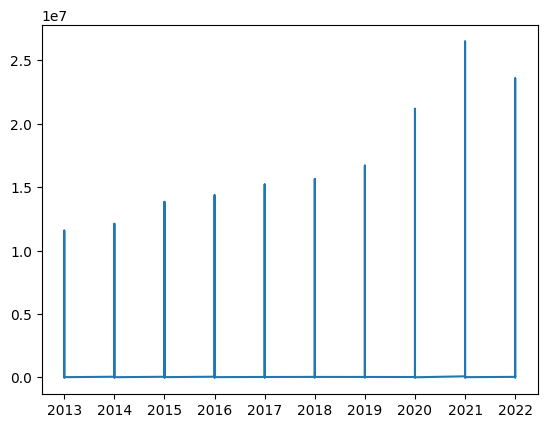

In [113]:
x_norte = df['ano'][(df['regiao'] == 'norte')]
y_norte = df['valor'][(df['regiao'] == 'norte')]

plt.plot(x_norte, y)
plt.show()